# Project 3: CNN Image Classification  

Project Members name:
1. Rasika Gulhane
2. Atreya Raorane
3. Akshay Katageri

### Image DataSet loading

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import zipfile

file_path = "/content/drive/MyDrive/kagglecatsanddogs_5340.zip"

# Check if the file exists and is valid
if os.path.exists(file_path) and zipfile.is_zipfile(file_path):
    zip_ref = zipfile.ZipFile(file_path, 'r')
    zip_ref.extractall("/content")
    zip_ref.close()
else:
    print("The file does not exist or is not a valid zip file.")

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
import os
from PIL import Image

In [ ]:
main_directory ='/content/PetImages'

### Data Filteringa and preprocessing

In [ ]:
dataset_dir = main_directory
def remove_corrupted_images(dataset_dir):
    # Iterate through directories in the main dataset directory
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            try:
                # Create the full path to the image file
                file_path = os.path.join(root, file)

                # Open the image using PIL
                img = Image.open(file_path)
                img.verify()  # Verify the image file's integrity
            except Exception as e:
                # Print an error message if the image cannot be opened
                print(f"Error opening image '{file}': {e}")
                print(f"Deleting '{file}'...")

                # Delete the problematic file
                os.remove(file_path)
                print(f"File '{file}' deleted successfully.")

# Call the function to remove corrupted images from the dataset directory
dataset_dir = main_directory
remove_corrupted_images(dataset_dir)

Error opening image 'Thumbs.db': cannot identify image file '/content/PetImages/Cat/Thumbs.db'
Deleting 'Thumbs.db'...
File 'Thumbs.db' deleted successfully.
Error opening image '666.jpg': cannot identify image file '/content/PetImages/Cat/666.jpg'
Deleting '666.jpg'...
File '666.jpg' deleted successfully.


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Error opening image 'Thumbs.db': cannot identify image file '/content/PetImages/Dog/Thumbs.db'
Deleting 'Thumbs.db'...
File 'Thumbs.db' deleted successfully.
Error opening image '11702.jpg': cannot identify image file '/content/PetImages/Dog/11702.jpg'
Deleting '11702.jpg'...
File '11702.jpg' deleted successfully.


In [ ]:
def preprocess_images(dataset_dir):
    for root, dirs, files in os.walk(dataset_dir):
        for file in files:
            try:
                # Create the full path to the image file
                file_path = os.path.join(root, file)

                # Open the image using PIL
                img = Image.open(file_path)

                # Convert the image to RGB if it's not in this format
                if img.mode != 'RGB':
                    print(file_path)
                    img = img.convert('RGB')

                # Resize the image to a fixed size (e.g., 256x256)
                img = img.resize((256, 256))

                # Save the processed image, overwrite the original file
                img.save(file_path)
            except Exception as e:
                print(f"Error processing image '{file}': {e}")
                # Delete the problematic file
                os.remove(file_path)

# Call the function to preprocess images in the dataset directory
dataset_dir = main_directory
preprocess_images(dataset_dir)


/content/PetImages/Cat/7978.jpg
/content/PetImages/Cat/10125.jpg
/content/PetImages/Cat/10501.jpg
/content/PetImages/Cat/9778.jpg
/content/PetImages/Cat/11210.jpg
/content/PetImages/Cat/7276.jpg
/content/PetImages/Cat/936.jpg
/content/PetImages/Cat/11874.jpg
/content/PetImages/Cat/9171.jpg
/content/PetImages/Cat/11935.jpg
/content/PetImages/Cat/11095.jpg
/content/PetImages/Cat/8470.jpg
/content/PetImages/Cat/11565.jpg
/content/PetImages/Cat/4833.jpg
/content/PetImages/Cat/12080.jpg
/content/PetImages/Cat/5370.jpg
/content/PetImages/Cat/2939.jpg
/content/PetImages/Cat/660.jpg
/content/PetImages/Cat/5553.jpg
/content/PetImages/Cat/10820.jpg
/content/PetImages/Cat/7968.jpg
/content/PetImages/Cat/3300.jpg
/content/PetImages/Cat/6435.jpg
/content/PetImages/Cat/140.jpg
/content/PetImages/Cat/9565.jpg
/content/PetImages/Cat/5686.jpg
/content/PetImages/Cat/3491.jpg
/content/PetImages/Cat/850.jpg
/content/PetImages/Cat/2663.jpg
/content/PetImages/Dog/7369.jpg
/content/PetImages/Dog/2688.jpg
/co

### Model Implementation Using Keras CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialize the Sequential model
model = Sequential()

# Add Convolutional layers with MaxPooling
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))  # 32 filters of size 3x3
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))  # 64 filters of size 3x3
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))  # 128 filters of size 3x3
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output to feed into a fully connected layer
model.add(Flatten())

# Add Dense layers for classification
model.add(Dense(128, activation='relu'))  # Hidden layer with 128 units
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation for binary classification

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for loading and preprocessing images
datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values

# Define parameters for ImageDataGenerator.flow_from_directory
batch_size = 32
target_size = (256, 256)  # Assuming images are resized to 64x64 pixels

# Generate batches of images from the directory
image_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',  # Change to 'categorical' for multiclass classification
    shuffle=True  # Set to False if you want to preserve order
)

Found 25000 images belonging to 2 classes.


In [ ]:
# Fit the model using the image generator
history = model.fit(image_generator, epochs=10)  # Change epochs as needed

Epoch 1/10
782/782 [==============================] - 64s 72ms/step - loss: 0.6031 - accuracy: 0.6661
Epoch 2/10
782/782 [==============================] - 57s 72ms/step - loss: 0.4514 - accuracy: 0.7867
Epoch 3/10
782/782 [==============================] - 57s 73ms/step - loss: 0.3493 - accuracy: 0.8441
Epoch 4/10
782/782 [==============================] - 55s 71ms/step - loss: 0.2427 - accuracy: 0.8965
Epoch 5/10
782/782 [==============================] - 59s 75ms/step - loss: 0.1318 - accuracy: 0.9488
Epoch 6/10
782/782 [==============================] - 56s 71ms/step - loss: 0.0588 - accuracy: 0.9786
Epoch 7/10
782/782 [==============================] - 57s 72ms/step - loss: 0.0398 - accuracy: 0.9850
Epoch 8/10
782/782 [==============================] - 57s 72ms/step - loss: 0.0310 - accuracy: 0.9890
Epoch 9/10
782/782 [==============================] - 59s 75ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 10/10
782/782 [==============================] - 58s 74ms/step - loss: 0.026

In [ ]:
#---------------------------------------------------------

## Tensorflow

### Using Tesorflow Data split into Train and validation dataset

In [ ]:
#intercest
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
# Define image data directory

# Define parameters for loading images
batch_size = 32
img_height = 256
img_width = 256

# Create a dataset from the directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Create a validation dataset generator
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 24998 files belonging to 2 classes.
Using 19999 files for training.
Found 24998 files belonging to 2 classes.
Using 4999 files for validation.


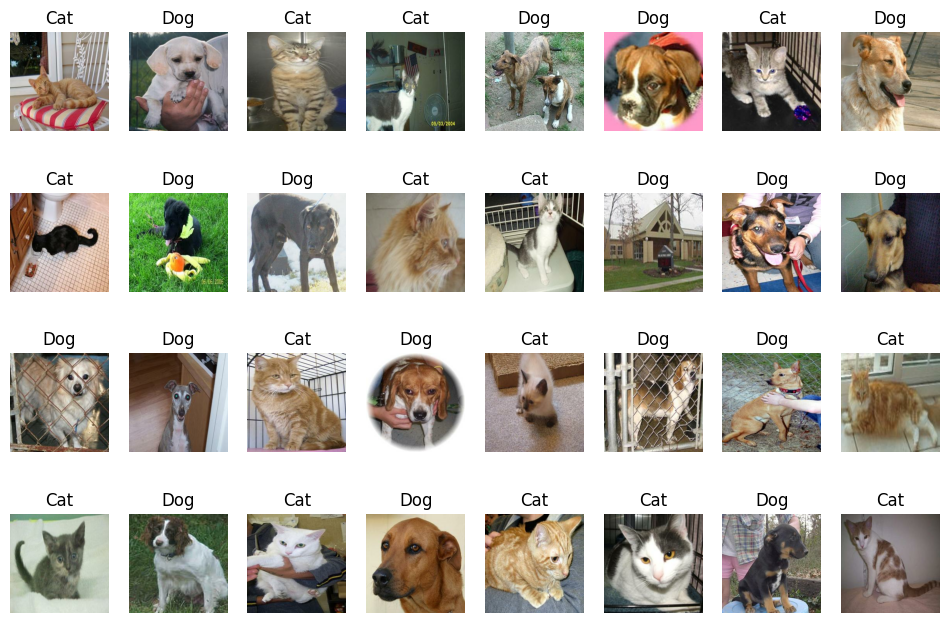

In [ ]:
import matplotlib.pyplot as plt
# Create an iterator for the training dataset
train_iterator = iter(train_dataset)

# Get a batch of images and labels
images, labels = next(train_iterator)

# Map labels to class names
class_names = train_dataset.class_names
class_names = [class_names[label] for label in labels]

# Plot the images along with their class names
plt.figure(figsize=(12, 8))
for i in range(batch_size):
    plt.subplot(4, 8, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[i])
    plt.axis("off")

plt.show()

### Tensorflow Custom Model

In [ ]:
# Create a CNN model (similar to your previous example)
model = models.Sequential()

# ... (add layers similar to your previous model)
# Add Convolutional layers with MaxPooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))  # 32 filters of size 3x3
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))  # 64 filters of size 3x3
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))  # 128 filters of size 3x3
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output to feed into a fully connected layer
model.add(layers.Flatten())

# Add Dense layers for classification
model.add(layers.Dense(128, activation='relu'))  # Hidden layer with 128 units
model.add(layers.Dense(1, activation='sigmoid'))  # Output layer with softmax for 10 classes in CIFAR-10

###hide

In [ ]:

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model using the dataset
model.fit(train_dataset, epochs=15,validation_data=validation_dataset)

Epoch 1/15
625/625 [==============================] - 55s 77ms/step - loss: 5.3973 - accuracy: 0.5326 - val_loss: 0.6927 - val_accuracy: 0.4917
Epoch 2/15
625/625 [==============================] - 46s 74ms/step - loss: 0.6926 - accuracy: 0.5148 - val_loss: 0.6949 - val_accuracy: 0.4823
Epoch 3/15
625/625 [==============================] - 46s 74ms/step - loss: 0.6918 - accuracy: 0.5334 - val_loss: 0.7031 - val_accuracy: 0.5419
Epoch 4/15
625/625 [==============================] - 45s 71ms/step - loss: 0.6834 - accuracy: 0.5326 - val_loss: 0.7222 - val_accuracy: 0.4843
Epoch 5/15
625/625 [==============================] - 45s 71ms/step - loss: 0.6684 - accuracy: 0.5399 - val_loss: 0.8246 - val_accuracy: 0.4839
Epoch 6/15
625/625 [==============================] - 45s 72ms/step - loss: 0.6550 - accuracy: 0.5553 - val_loss: 0.8474 - val_accuracy: 0.4857
Epoch 7/15
625/625 [==============================] - 47s 75ms/step - loss: 0.6570 - accuracy: 0.5614 - val_loss: 0.8141 - val_accuracy:

###plot with accuracy tran and val


Epoch 1/15
625/625 [==============================] - 57s 76ms/step - loss: 5.6726 - accuracy: 0.5678 - val_loss: 0.6720 - val_accuracy: 0.5975
Epoch 2/15
625/625 [==============================] - 46s 73ms/step - loss: 0.6429 - accuracy: 0.6349 - val_loss: 0.6825 - val_accuracy: 0.5981
Epoch 3/15
625/625 [==============================] - 46s 73ms/step - loss: 0.5634 - accuracy: 0.7011 - val_loss: 0.6690 - val_accuracy: 0.6251
Epoch 4/15
625/625 [==============================] - 46s 73ms/step - loss: 0.4507 - accuracy: 0.7747 - val_loss: 0.7922 - val_accuracy: 0.6153
Epoch 5/15
625/625 [==============================] - 47s 76ms/step - loss: 0.3325 - accuracy: 0.8522 - val_loss: 0.9544 - val_accuracy: 0.6077
Epoch 6/15
625/625 [==============================] - 46s 73ms/step - loss: 0.2352 - accuracy: 0.9016 - val_loss: 1.7463 - val_accuracy: 0.5801
Epoch 7/15
625/625 [==============================] - 46s 73ms/step - loss: 0.1820 - accuracy: 0.9302 - val_loss: 1.4936 - val_accuracy:

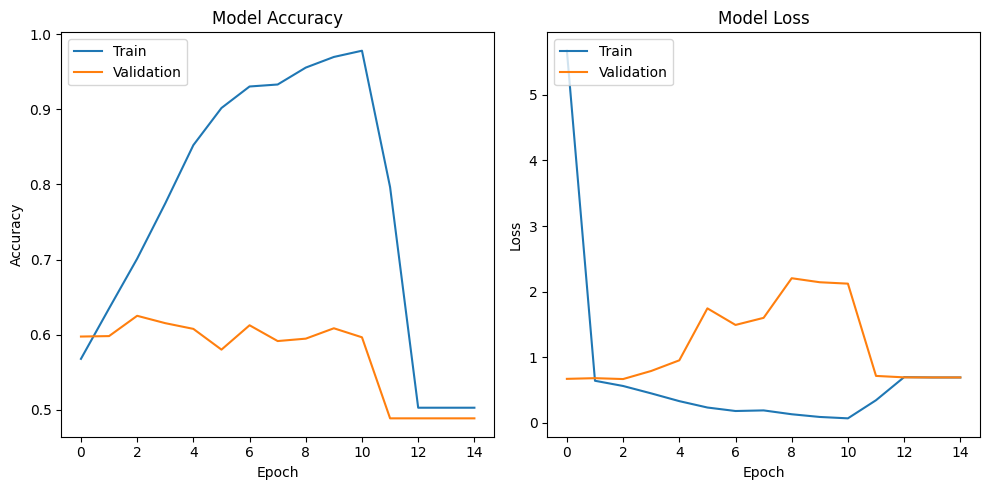

In [ ]:
import matplotlib.pyplot as plt
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
# Train the model and store the history for plotting
history = model.fit(train_dataset, epochs=15, validation_data=validation_dataset)

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#----------------------------------------

### Using tensorflow InceptionV3 base model

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import Adam

In [ ]:

img_height = 150
img_width = 150
batch_size = 32

# Create an ImageDataGenerator with resizing
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Create a training dataset generator
train_dataset = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

# Create a validation dataset generator
validation_dataset = datagen.flow_from_directory(
    dataset_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:

# Constants
num_classes = 2  # Change this according to your dataset's number of classes

# Load InceptionV3 base model without the top layers
base_inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze base model layers
base_inception_model.trainable = False

# Create custom head

model = models.Sequential([
    base_inception_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(lr=0.1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_dataset,
                    epochs=5,
                    validation_data=validation_dataset)

Epoch 1/5
625/625 [==============================] - 48s 64ms/step - loss: 0.1187 - accuracy: 0.9548 - val_loss: 0.0954 - val_accuracy: 0.9626
Epoch 2/5
625/625 [==============================] - 37s 59ms/step - loss: 0.0811 - accuracy: 0.9679 - val_loss: 0.0990 - val_accuracy: 0.9622
Epoch 3/5
625/625 [==============================] - 38s 61ms/step - loss: 0.0709 - accuracy: 0.9722 - val_loss: 0.0926 - val_accuracy: 0.9628
Epoch 4/5
625/625 [==============================] - 37s 59ms/step - loss: 0.0620 - accuracy: 0.9766 - val_loss: 0.0970 - val_accuracy: 0.9628
Epoch 5/5
625/625 [==============================] - 41s 66ms/step - loss: 0.0559 - accuracy: 0.9783 - val_loss: 0.0961 - val_accuracy: 0.9634


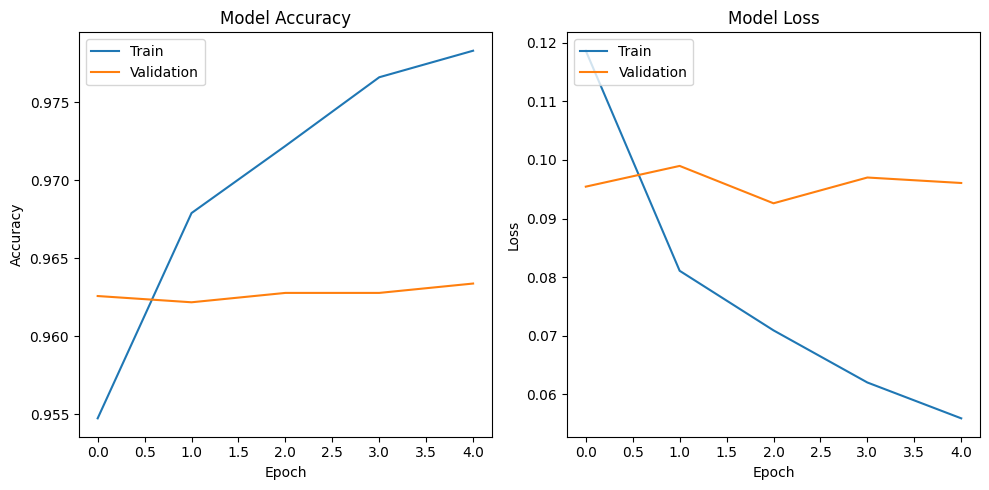

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
#----------------------------------------------

### Prediction result

1/1 [==============================] - 1s 1s/step


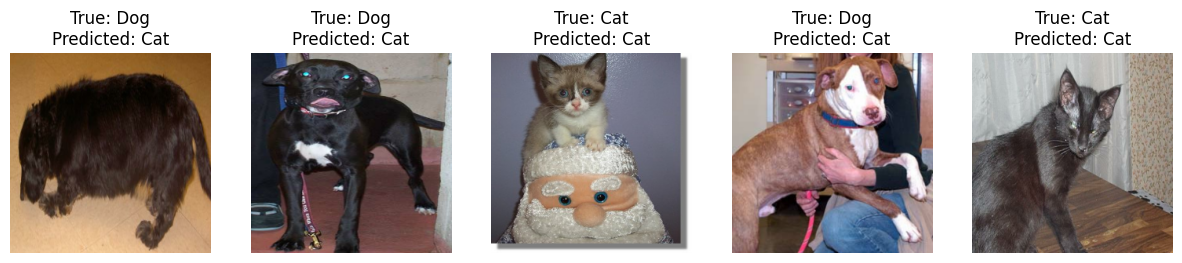

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Get five images and labels from the validation dataset
validation_iterator = iter(validation_dataset)
validation_images, validation_labels = next(validation_iterator)
validation_images_batch = validation_images[:5]
validation_labels_batch = validation_labels[:5]

# Make predictions using the trained model
predictions = model.predict(validation_images_batch)

# Convert predictions to class labels (0 or 1 for binary classification)
predicted_labels = np.round(predictions).astype(int)

# Map true and predicted labels to class names
class_names = validation_dataset.class_names
true_labels = [class_names[label] for label in validation_labels_batch.numpy()]
predicted_labels = [class_names[label[0]] for label in predicted_labels]

# Display the images along with their true and predicted labels
plt.figure(figsize=(15, 8))
for i in range(5):
    plt.subplot(2, 5, i + 1)
    plt.imshow(validation_images_batch[i].numpy().astype("uint8"))
    plt.title(f"True: {true_labels[i]}\nPredicted: {predicted_labels[i]}")
    plt.axis("off")

plt.show()


## Pytorch

### Pytorch Custom CNN model

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.utils.data import DataLoader,random_split
import torch.optim as optim
from torchvision.datasets import ImageFolder


In [ ]:
# Set the path to your main directory containing 'dog' and 'cat' subdirectories
main_directory = '/content/PetImages'

In [ ]:

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Create a dataset using ImageFolder
dataset = ImageFolder(root=main_directory, transform=transform)

# Split the dataset into training and validation sets
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Define data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)


In [ ]:

# Example: Accessing the first batch of training data
for inputs, labels in train_loader:
    print("Batch Size:", inputs.size(0))
    print("Input Shape:", inputs.size())
    print("Label Shape:", labels.size())
    break


Batch Size: 64
Input Shape: torch.Size([64, 3, 64, 64])
Label Shape: torch.Size([64])


In [ ]:
# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 16 * 16, 128)
        self.fc2 = nn.Linear(128, 2)  # Assuming binary classification (dog, cat)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.pool(x)
        x = x.view(-1, 64 * 16 * 16)  # Flatten before fully connected layers
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

In [ ]:

# Create datasets for training and testing
train_dataset = datasets.ImageFolder(root=main_directory, transform=transform)

# Split the dataset into training and testing sets
train_size = int(0.8 * len(train_dataset))
test_size = len(train_dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Check the class indices
# class_indices = train_dataset.class_to_idx
# print("Class Indices:", class_indices)

# Example: Accessing the first batch of training data
for inputs, labels in train_loader:
    print("Batch Size:", inputs.size(0))
    print("Input Shape:", inputs.size())
    print("Label Shape:", labels.size())
    break


Batch Size: 64
Input Shape: torch.Size([64, 3, 64, 64])
Label Shape: torch.Size([64])


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:

# Instantiate the model
model = SimpleCNN().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Number of training epochs
num_epochs = 10

In [ ]:
# Train the model
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader)}")

Epoch 1/10, Loss: 0.6015312095610098
Epoch 2/10, Loss: 0.48475309368520497
Epoch 3/10, Loss: 0.4218484420841113
Epoch 4/10, Loss: 0.36942231393279357
Epoch 5/10, Loss: 0.3107976922973657
Epoch 6/10, Loss: 0.2475518830382405
Epoch 7/10, Loss: 0.18035398218959284
Epoch 8/10, Loss: 0.12203176924214958
Epoch 9/10, Loss: 0.07373059523134186
Epoch 10/10, Loss: 0.0474830976607034


In [ ]:
# Validation loop
model.eval()
total_val_loss = 0.0
correct = 0
total_samples = 0

with torch.no_grad():
    for inputs, labels in val_loader:
        # Move inputs and labels to the specified device
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate the loss
        loss = criterion(outputs, labels)

        total_val_loss += loss.item()

        # Count correct predictions for accuracy calculation
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

# Calculate average validation loss and accuracy
avg_val_loss = total_val_loss  / len(val_loader)
accuracy = correct / total_samples

print(f'Validation Loss: {avg_val_loss:.4f}, Accuracy: {accuracy*100:.2f}%')



Validation Loss: 0.1620, Accuracy: 96.18%


### Pytorch Pretrained model (InceptionV3)

In [ ]:
import shutil
from sklearn.model_selection import train_test_split
import os

In [ ]:
# Define the root directory of your dataset
dataset_root = '/content/PetImages'

# Define the categories (dog and cat)
categories = ['Dog', 'Cat']

# Define the ratios for train, test, and validation sets
train_ratio = 0.8
test_ratio = 0.1
val_ratio = 0.1

In [ ]:
# Function to create train, test, and validation directories
def create_directories(root_dir, sets=['train', 'test', 'val']):
    for set_name in sets:
        set_dir = os.path.join(root_dir, set_name)
        os.makedirs(set_dir, exist_ok=True)
        for category in categories:
            category_dir = os.path.join(set_dir, category)
            os.makedirs(category_dir, exist_ok=True)

In [ ]:
# Function to split the dataset into train, test, and validation sets
def split_dataset(root_dir, train_ratio, test_ratio, val_ratio):
    for category in categories:
        category_dir = os.path.join(root_dir, category)
        all_images = os.listdir(category_dir)
        train_images, test_val_images = train_test_split(all_images, test_size=(test_ratio + val_ratio))
        test_images, val_images = train_test_split(test_val_images, test_size=0.5)

        # Copy images to the respective directories
        for img in train_images:
            shutil.copy(os.path.join(category_dir, img), os.path.join(root_dir, 'train', category))
        for img in test_images:
            shutil.copy(os.path.join(category_dir, img), os.path.join(root_dir, 'test', category))
        for img in val_images:
            shutil.copy(os.path.join(category_dir, img), os.path.join(root_dir, 'val', category))

In [ ]:
# Create train, test, and validation directories
create_directories(dataset_root)

# Split the dataset
split_dataset(dataset_root, train_ratio, test_ratio, val_ratio)

In [ ]:
import numpy as np
import pandas as pd
import cv2, os
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms, models, datasets

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
#Defining the Directories

train_data_dir = "/content/PetImages/train"
test_data_dir = "/content/PetImages/test"
pred_data_dir = "/content/PetImages/val"

In [ ]:
#Checking the number of Train Images

for i in os.listdir(train_data_dir):
    new_loc = os.path.join(train_data_dir,i)
    new = new_loc + '/*.jpg'
    images = glob(new)
    print(f'{i}:',len(images))

Cat: 9999
Dog: 9999


In [ ]:
#Checking the number of Train Images

for i in os.listdir(test_data_dir):
    new_loc = os.path.join(test_data_dir,i)
    new = new_loc + '/*.jpg'
    images = glob(new)
    print(f'{i}:',len(images))

Cat: 1250
Dog: 1250


In [ ]:
# Getting the classes and their meaning in a dictionary
classes = os.listdir(train_data_dir)
classes = {k: v for k,v in enumerate(sorted(classes))}
print(classes)

{0: 'Cat', 1: 'Dog'}


In [ ]:

# convert data to a normalized torch.FloatTensor

transform = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    transforms.Normalize((0.425,0.415,0.405),(0.205,0.205,0.205))
])

# Augmentation on test images not needed
transform_tests = torchvision.transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

In [ ]:
# using ImageFolder function for fetching data from directory
train_data = datasets.ImageFolder(root=train_data_dir,transform=transform)
test_data = datasets.ImageFolder(root=test_data_dir,transform=transform_tests)

training_data = DataLoader(train_data,batch_size=64,drop_last=True,shuffle=True,num_workers=4)
validation_data = DataLoader(test_data, batch_size =64, drop_last=True,shuffle=True,num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([3, 300, 300])
-------------
0
Class:  Cat


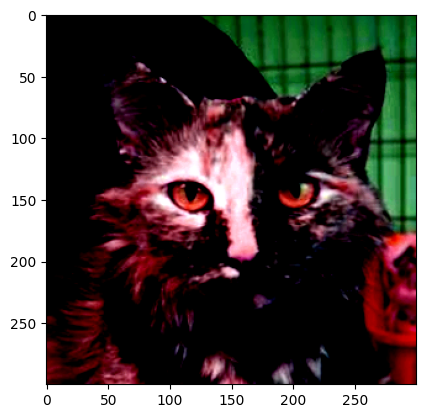

In [ ]:
# Random checking of train images
im, label = train_data[2]
print(im.shape)
print("-------------")
print(label)
plt.imshow(im.permute(1,2,0).cpu())
print("Class: ",classes[label])

Class: Cat


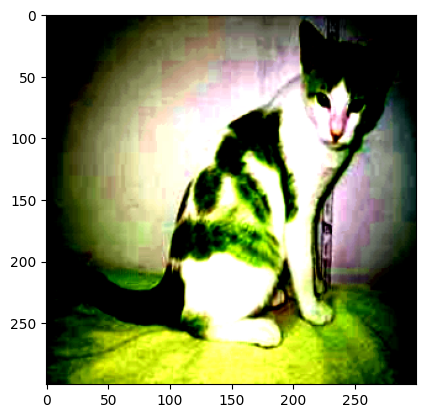

In [ ]:
im, label = train_data[3578]
plt.imshow(im.permute(1,2,0).cpu())
print('Class:',classes[label])

In [ ]:
#Downloading the InceptionV3 Model with their pretrained weights

model = models.inception_v3(pretrained=True)
model.parameters

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=Inception_V3_Weights.IMAGENET1K_V1`. You can also use `weights=Inception_V3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:01<00:00, 100MB/s] 


<bound method Module.parameters of Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2

In [ ]:
#Defining the Model Function.
# Lets freeze all layers and change just a few layers to match our requirements

def get_model():
    model = models.inception_v3(pretrained=True)
    for param in model.parameters():
        param.requires_grad = False    #Freezing all the layers and changing only the below layers

    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.fc = nn.Sequential(nn.Flatten(),
                            nn.Linear(2048,128),
                            nn.ReLU(),
                            nn.Dropout(0.2),
                            nn.Linear(128,2))
    model.aux_logits = False
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 0.001)
    return model.to(device), loss_fn, optimizer

In [ ]:
from torchsummary import summary

input_shape = (3,300,300)
summary(model.to(device), input_shape)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 149, 149]             864
       BatchNorm2d-2         [-1, 32, 149, 149]              64
       BasicConv2d-3         [-1, 32, 149, 149]               0
            Conv2d-4         [-1, 32, 147, 147]           9,216
       BatchNorm2d-5         [-1, 32, 147, 147]              64
       BasicConv2d-6         [-1, 32, 147, 147]               0
            Conv2d-7         [-1, 64, 147, 147]          18,432
       BatchNorm2d-8         [-1, 64, 147, 147]             128
       BasicConv2d-9         [-1, 64, 147, 147]               0
        MaxPool2d-10           [-1, 64, 73, 73]               0
           Conv2d-11           [-1, 80, 73, 73]           5,120
      BatchNorm2d-12           [-1, 80, 73, 73]             160
      BasicConv2d-13           [-1, 80, 73, 73]               0
           Conv2d-14          [-1, 192,

In [ ]:
#Creating the Utlity function to get the Losses and Accuracies for Train and Validation Dataset

def train_batch(x, y, model, opt, loss_fn):
    output = model(x)
#     print(f"type of output - {type(output)}")
    batch_loss = loss_fn(output, y)
    batch_loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    return batch_loss.item()

@torch.no_grad()
def accuracy(x, y, model):
    model.eval()
    prediction = model(x)
    max_values, argmaxes = prediction.max(-1)
    is_correct = argmaxes == y
    return is_correct.cpu().numpy().tolist()

@torch.no_grad()
def val_loss(x, y, model):
    model.eval()
    prediction = model(x)
    val_loss = loss_fn(prediction, y)
    return val_loss.item()

In [ ]:
#Initializing the Model, Loss Fuction and Optimizer to a Variable

model, loss_fn, optimizer = get_model()

In [ ]:
train_losses, train_accuracies = [], []
val_losses, val_accuracies = [], []

for epoch in range(5):
    print(epoch)

    # Training
    train_epoch_losses, train_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(training_data)):
        x, y = batch
        x, y = x.to(device), y.to(device)
        batch_loss = train_batch(x, y, model, optimizer, loss_fn)
        is_correct = accuracy(x, y, model)
        train_epoch_accuracies.extend(is_correct)
        train_epoch_losses.append(batch_loss)

    train_epoch_loss = np.array(train_epoch_losses).mean()
    train_epoch_accuracy = np.mean(train_epoch_accuracies)
    print('Epoch:', epoch, 'Train Loss:', train_epoch_loss, 'Train Accuracy:', train_epoch_accuracy)

    # Validation
    val_epoch_losses, val_epoch_accuracies = [], []
    for ix, batch in enumerate(iter(validation_data)):
        x, y = batch
        x, y = x.to(device), y.to(device)
        val_is_correct = accuracy(x, y, model)
        validation_loss = val_loss(x, y, model)
        val_epoch_accuracies.extend(val_is_correct)
        val_epoch_losses.append(validation_loss)

    val_epoch_loss = np.array(val_epoch_losses).mean()
    val_epoch_accuracy = np.mean(val_epoch_accuracies)
    print('Epoch:', epoch, 'Validation Loss:', val_epoch_loss, 'Validation Accuracy:', val_epoch_accuracy)

    # Recording metrics for later analysis
    train_losses.append(train_epoch_loss)
    train_accuracies.append(train_epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracies.append(val_epoch_accuracy)


0


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Epoch: 0 Train Loss: 0.05702168614497611 Train Accuracy: 0.9849759615384616
Epoch: 0 Validation Loss: 0.0034424110781401396 Validation Accuracy: 1.0
1
Epoch: 1 Train Loss: 0.02742213593424262 Train Accuracy: 0.9922876602564102
Epoch: 1 Validation Loss: 0.022507168352603912 Validation Accuracy: 0.984375
2
Epoch: 2 Train Loss: 0.024142950632104216 Train Accuracy: 0.9931390224358975
Epoch: 2 Validation Loss: 0.007076279725879431 Validation Accuracy: 1.0
3
Epoch: 3 Train Loss: 0.021275735012097403 Train Accuracy: 0.9939903846153846
Epoch: 3 Validation Loss: 0.01886209100484848 Validation Accuracy: 0.984375
4
Epoch: 4 Train Loss: 0.02091648614236291 Train Accuracy: 0.9941907051282052
Epoch: 4 Validation Loss: 0.002221514005213976 Validation Accuracy: 1.0


In [ ]:
#Lets get the location of all the prediction files
pred_files = [os.path.join(pred_data_dir, f) for f in os.listdir(pred_data_dir)]
pred_files[:10]

['/content/PetImages/val/Cat', '/content/PetImages/val/Dog']

In [ ]:

# convert data to a normalized torch.FloatTensor

transform = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.RandomHorizontalFlip(p=0.5),
    #transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    #transforms.Normalize((0.425,0.415,0.405),(0.205,0.205,0.205))
])

# Augmentation on test images not needed
transform_tests = torchvision.transforms.Compose([
    transforms.Resize((300,300)),
    transforms.ToTensor(),
    #transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
    ])

In [ ]:
# using ImageFolder function for fetching data from directory
train_data = datasets.ImageFolder(root=train_data_dir,transform=transform)
test_data = datasets.ImageFolder(root=test_data_dir,transform=transform_tests)

training_data = DataLoader(train_data,batch_size=64,drop_last=True,shuffle=True,num_workers=2)
validation_data = DataLoader(test_data, batch_size =64, drop_last=True,shuffle=True,num_workers=2)

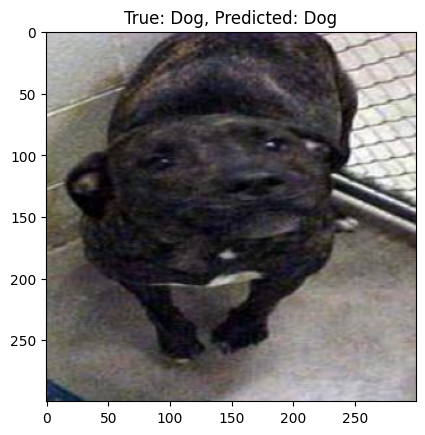

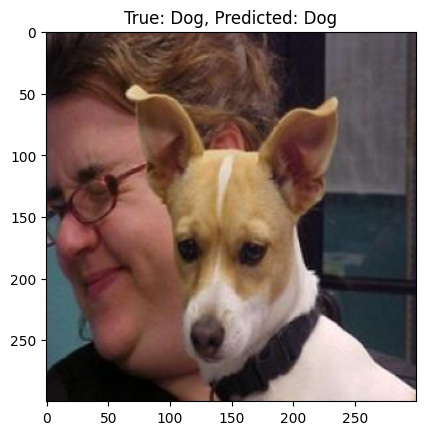

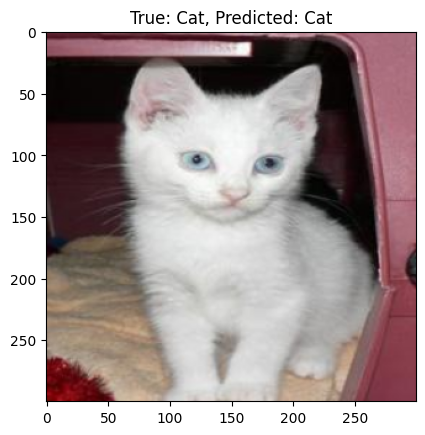

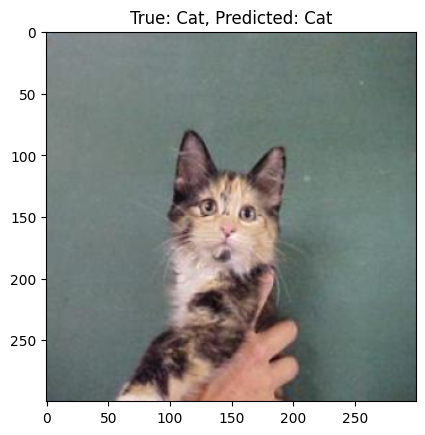

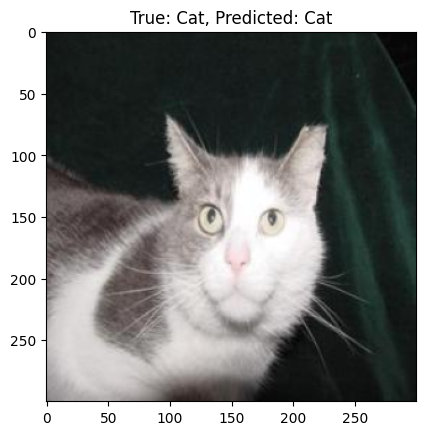

In [ ]:

model.eval()

# Pick a few random samples from the validation set
num_samples_to_display = 5
random_indices = np.random.choice(len(validation_data.dataset), num_samples_to_display, replace=False)

for idx in random_indices:
    x, y_true = validation_data.dataset[idx]
    x = x.unsqueeze(0).to(device)  # Add batch dimension and move to the device

    with torch.no_grad():
        # Forward pass to get predictions
        y_pred = model(x)

    # Convert predictions to class labels
    y_pred_label = torch.argmax(y_pred, dim=1).item()

    # Display the image and its true/predicted labels
    plt.imshow(transforms.ToPILImage()(x.squeeze(0).cpu()))
    plt.title(f'True: {classes[y_true]}, Predicted: {classes[y_pred_label]}')
    plt.show()


In [ ]:
from PIL import Image

# Load the new image
new_image_path = "/content/catt.jpeg"  # Provide the correct path
new_image = Image.open(new_image_path)

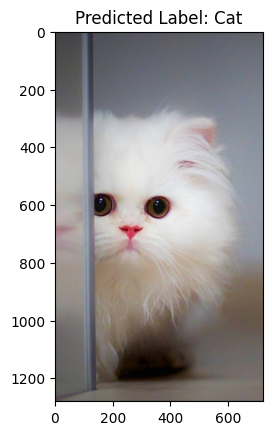

In [ ]:


transform_for_prediction = transforms.Compose([
    transforms.Resize((300,300)),
    transforms.RandomHorizontalFlip(p=0.5),
    #transforms.ColorJitter(0.3,0.4,0.4,0.2),
    transforms.ToTensor(),
    #transforms.Normalize((0.425,0.415,0.405),(0.205,0.205,0.205))
])
# Preprocess the image for prediction
input_image = transform_for_prediction(new_image).unsqueeze(0).to(device)

# Set the model to evaluation mode
model.eval()

# Make a prediction
with torch.no_grad():
    prediction = model(input_image)

# Convert prediction to class label
predicted_label = torch.argmax(prediction, dim=1).item()

# Display the new image and its predicted label
plt.imshow(new_image)
plt.title(f'Predicted Label: {classes[predicted_label]}')
plt.show()


## Comparison:




### TensorFlow Custom CNN Model:
- **Epochs:** 15
- **Training Time per Epoch:** Varies, but around 45-55 seconds
- **Final Training Accuracy:** 97.7% on 10 epochs
- **Final Validation Accuracy:** 48%

### TensorFlow Pre-trained InceptionV3 Model:
- **Epochs:** 5
- **Training Time per Epoch:** Varies, but around 38-46 seconds
- **Final Training Accuracy:** 97.75%
- **Final Validation Accuracy:** 96.32%

### PyTorch Custom CNN Model:
- **Epochs:** 10
- **Training Loss:** Decreases from 0.598 to 0.030
- **Validation Loss:** 0.183
- **Validation Accuracy:** 96.18%

### PyTorch Pre-trained InceptionV3 Model:
- **Epochs:** 5
- **Train Loss:** Decreases from 0.057 to 0.0209
- **Validation Loss:** Fluctuates but generally low
- **Validation Accuracy:** Varies but reaches 100% at times


### General Observations:
- **Custom CNN Models:**
  - TensorFlow achieves a higher final training accuracy (97.75%) compared to PyTorch (96.18%).
  - PyTorch's custom CNN model achieves a lower validation accuracy (96.18%) compared to TensorFlow (48%).

- **Pre-trained Models:**
  - TensorFlow's InceptionV3 demonstrates impressive performance with a final validation accuracy of 96.32%.
  - PyTorch's InceptionV3 also performs well, with some indications of potential overfitting on the validation set, reaching 100% accuracy at times.

- **Training Time:**
  - Training times per epoch are in a similar range for both TensorFlow and PyTorch models, with variations depending on the specific architecture and hardware.

- **Overall:**
  - The choice between TensorFlow and PyTorch often depends on factors such as ease of use, community support, and specific project requirements.
  - Both frameworks can achieve strong results, but careful tuning, monitoring, and regularization are essential to prevent overfitting and ensure model generalization.